<a href="https://colab.research.google.com/github/douglascdsantos/alura_data-visualization-com-seaborn/blob/main/Data_Visualization_explorando_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Importando e traduzindo os dados

In [ ]:
import  pandas  as  pd
import  seaborn as  sns
from    scipy.stats import  ranksums

## Carregando Dados

In [ ]:
url = 'https://raw.githubusercontent.com/douglascdsantos/alura_data-visualization-com-seaborn/main/tips.csv'
df = pd.read_csv(url)
df.sample(10)

,total_bill,tip,dessert,day,time,size
58,11.24,1.76,Yes,Sat,Dinner,2
65,20.08,3.15,No,Sat,Dinner,3
104,20.92,4.08,No,Sat,Dinner,2
38,18.69,2.31,No,Sat,Dinner,3
73,25.28,5.00,Yes,Sat,Dinner,2
160,21.50,3.50,No,Sun,Dinner,4
63,18.29,3.76,Yes,Sat,Dinner,4
135,8.51,1.25,No,Thur,Lunch,2
50,12.54,2.50,No,Sun,Dinner,2
172,7.25,5.15,Yes,Sun,Dinner,2


## Traduzindo colunas e campos


In [ ]:
df.dtypes

valor_da_conta      float64
gorjeta             float64
sobremesa            object
dia_da_semana        object
hora_do_dia          object
total_de_pessoas      int64
dtype: object

In [ ]:
colunas_em_portugues = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
    }
df.rename(columns = colunas_em_portugues, inplace=True)
df

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


avaliando os valores únicos das colunas categoricas

In [ ]:
for i in df.select_dtypes(object).columns:
    print(i, df[i].unique())

sobremesa ['No' 'Yes']
dia_da_semana ['Sun' 'Sat' 'Thur' 'Fri']
hora_do_dia ['Dinner' 'Lunch']


In [ ]:
dict_sobremesa = {
    'No':False,
    'Yes': True
    }
dict_dia_da_semana = {
    'Sun':'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quita',
    'Fri': 'Sexta'
    }
dict_hora_do_dia = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
    }
df['sobremesa'] = df['sobremesa'].map(dict_sobremesa)
df['dia_da_semana'] = df['dia_da_semana'].map(dict_dia_da_semana)
df['hora_do_dia'] = df['hora_do_dia'].map(dict_hora_do_dia)
df

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,False,Domingo,Jantar,2
1,10.34,1.66,False,Domingo,Jantar,3
2,21.01,3.50,False,Domingo,Jantar,3
3,23.68,3.31,False,Domingo,Jantar,2
4,24.59,3.61,False,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,False,Sábado,Jantar,3
240,27.18,2.00,True,Sábado,Jantar,2
241,22.67,2.00,True,Sábado,Jantar,2
242,17.82,1.75,False,Sábado,Jantar,2


## 02. Comparando distribuições de maneira exploratória

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

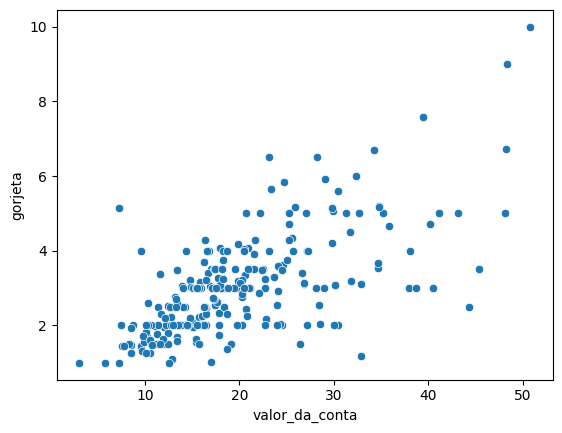

In [ ]:
sns.scatterplot(data= df, x = 'valor_da_conta', y = 'gorjeta')

temos que, aparentemente, o valor das gorjetas e o valor da conta estão diretamente proporcionais

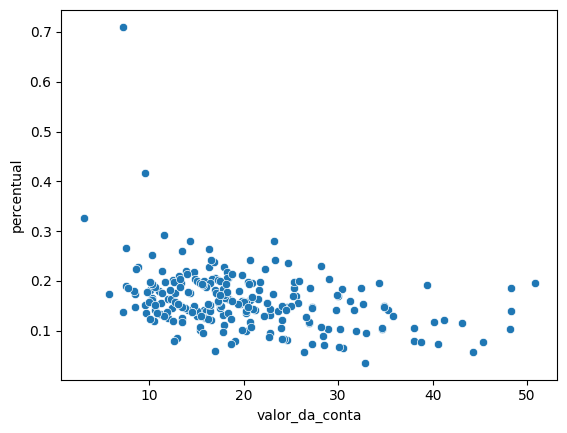

In [ ]:
df['percentual'] = df['gorjeta'] / df['valor_da_conta']
sns.scatterplot(data= df, x = 'valor_da_conta', y = 'percentual');

ao olhar o quanto o (%) da gorjeta referente ao valor total temos que o mesmo não é diretamente proporcional ao valor da conta

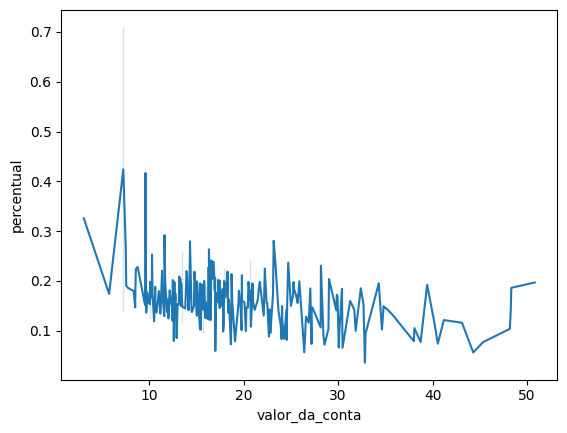

In [ ]:
sns.lineplot(data= df, x = 'valor_da_conta', y = 'percentual');

# 03. Analisando de forma visual e descritiva

In [ ]:
df['sobremesa'].value_counts(normalize=True)*100

False    61.885246
True     38.114754
Name: sobremesa, dtype: float64

temos que 1/3 dos pedidos pediram sobremesa

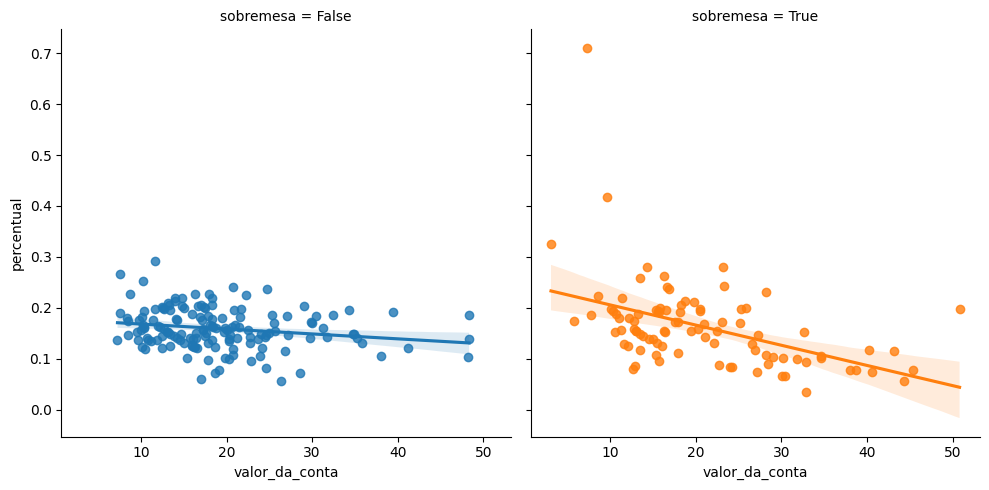

In [ ]:
sns.lmplot(data= df, x = 'valor_da_conta', y = 'percentual', col = 'sobremesa', hue = 'sobremesa');

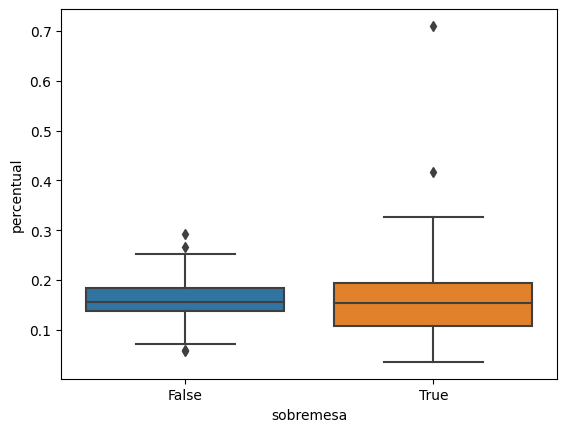

In [ ]:
sns.boxplot(data= df, x = 'sobremesa', y = 'percentual');

para consumidores que não consumiram sobremesa temos um valor de gorjeta mais concentrado em comparação aos que pediram sobremesa

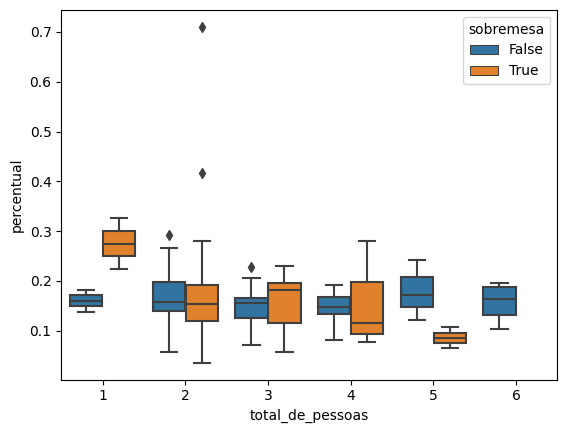

In [ ]:
sns.boxplot(data= df, x = 'total_de_pessoas', y = 'percentual', hue = 'sobremesa');

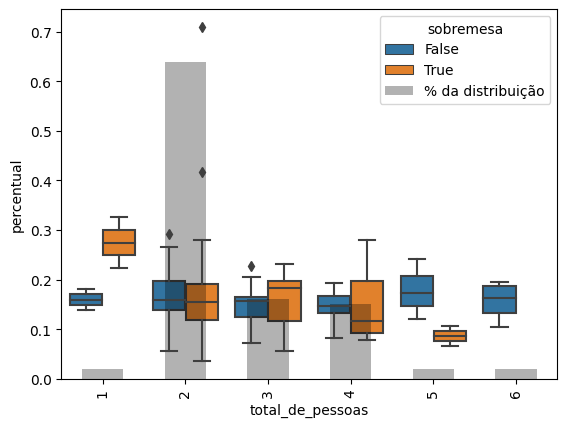

In [ ]:
a = (pd.crosstab(index = df['sobremesa'], columns = df['total_de_pessoas'], values= df['sobremesa'], aggfunc='count', normalize=True, margins=True, margins_name='% da distribuição')).round(2)
a.iloc[-1,:-1].plot(kind='bar', color ='black', alpha = 0.3)
sns.boxplot(data= df, x = 'total_de_pessoas', y = 'percentual', hue = 'sobremesa');


In [ ]:
a

total_de_pessoas,1,2,3,4,5,6,% da distribuição
sobremesa,,,,,,,
False,0.01,0.37,0.11,0.11,0.01,0.02,0.62
True,0.01,0.27,0.05,0.05,0.01,0.00,0.38
% da distribuição,0.02,0.64,0.16,0.15,0.02,0.02,1.00


no visual acima temos a distribuição do percentual de gorjeta detalhado por total de pessoas e se pediu sobremesa ou não, também temos o % de cada total de pessoas representa na tabela, temos que para duas pessoas temos cerca de 65% dos nosso dados e o valor mediano está bem próximos de ambos, mas para clientes que não consumiram sobremesa a distribuição está mais concentrada

## Teste de Hipoteses

H<sup>null</sup>
> A distribuição da taxa de gorjeta é a mesmma para os dois grupos

H<sup>alt</sup>
> A distribuição da taxa de gorjeta não é a mesmma para os dois grupos


In [ ]:
com_sobremesa = df.query('sobremesa == True')['percentual']
sem_sobremesa = df.query('sobremesa == False')['percentual']
r = ranksums(com_sobremesa,sem_sobremesa)
print(f'O valor do p-value é {r.pvalue:.2f}')

O valor do p-value é 0.56


Por enquanto, a resposta que nos importará é o pvalue de arredondados 0.56, o que significará que, apesar de os dois grupos terem dado gorjetas de valores diferentes entre si, a diferença é insignificante do ponto de vista matemático. Ou seja, não poderemos dizer que a população geral será diferente também.

Cientes disso, continuaremos somente com nossa hipótese nula, não aceitando mais a hipótese alternativa. Para aceitarmos esta última, o valor de pvalue deveria ser igual ou menor do que 0.05. Como nosso resultado foi maior do que isso, poderemos descartar esta hipótese alternativa.

# 04. Comparando e explorando os dias da semana

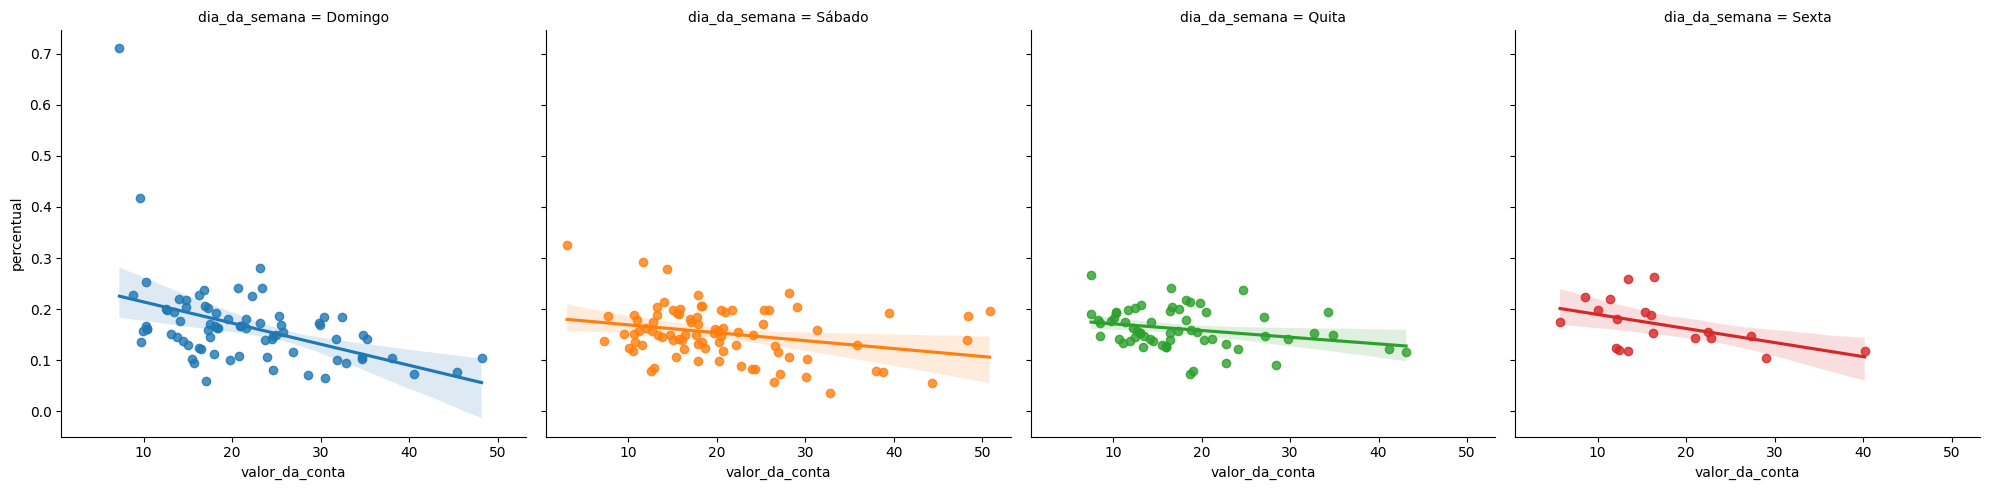

In [ ]:
sns.lmplot(data= df, x = 'valor_da_conta', y = 'percentual', col = 'dia_da_semana', hue = 'dia_da_semana');

In [ ]:
df.groupby(['dia_da_semana'])[['valor_da_conta','gorjeta','percentual']].mean()

,valor_da_conta,gorjeta,percentual
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166897
Quita,17.682742,2.771452,0.161276
Sexta,17.151579,2.734737,0.169913
Sábado,20.441379,2.993103,0.153152


In [ ]:
df['dia_da_semana'].value_counts()

Sábado     87
Domingo    76
Quita      62
Sexta      19
Name: dia_da_semana, dtype: int64

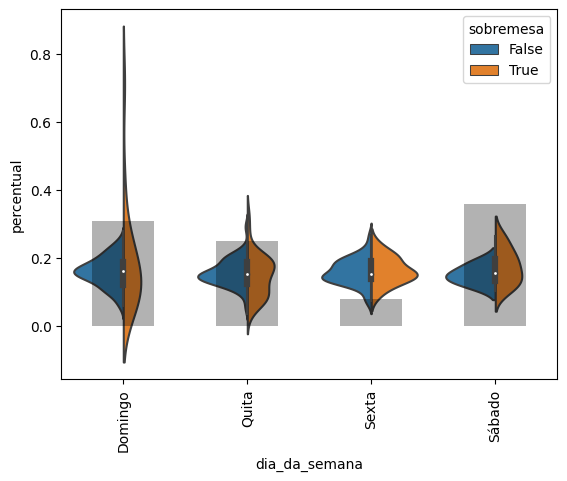

In [ ]:
b = pd.crosstab(index = df['sobremesa'], columns = df['dia_da_semana'], values= df['sobremesa'], aggfunc='count', normalize=True, margins=True, margins_name='% da distribuição').round(2)
sns.violinplot(data=df, y = 'percentual', x = 'dia_da_semana', hue = 'sobremesa', split = True)
b.iloc[-1,:-1].plot(kind='bar', color ='black', alpha = 0.3);

In [ ]:
b

dia_da_semana,Domingo,Quita,Sexta,Sábado,% da distribuição
sobremesa,,,,,
False,0.23,0.18,0.02,0.18,0.62
True,0.08,0.07,0.06,0.17,0.38
% da distribuição,0.31,0.25,0.08,0.36,1.00


## Teste de Hipoteses

H<sup>null</sup>
> A distribuição do valor da conta é igual no sábado e no domingo

H<sup>alt</sup>
> A distribuição do valor da conta não é igual no sábado e no domingo


In [ ]:
valor_conta_dom = df.query('dia_da_semana == "Domingo"')['valor_da_conta']
valor_conta_sab = df.query('dia_da_semana == "Sábado"')['valor_da_conta']
r = ranksums(com_sobremesa,sem_sobremesa)
print(f'O valor do p-value é {r.pvalue:.2f}')